In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_gate_map
import numpy as np

## 1. Circuit Construction

In [2]:
# Create three quantum registers (sender’s qubit, shared entanglement pair, receiver’s qubit) and two classical registers.
qc = QuantumCircuit(3,2)

In [3]:
# Values for the sender qubit
# Arbitrary values that rotate the qubit 
theta, phi, lam = np.pi/3, np.pi/4, np.pi/2

qc.u(theta, phi, lam, 0) # U gate on 0 qubit


In [4]:
# Entangle qubit 1 and qubit 3 to a bell state
qc.h(1)
qc.cx(1, 2)

In [5]:
# Bell measurement on sender side
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

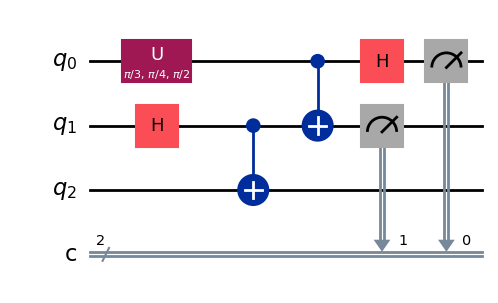

In [6]:
qc.draw("mpl")

## 2. Exeuction on Simulators

In [7]:
from qiskit_aer import AerSimulator
sim = AerSimulator()

In [10]:
# Transpile for the simulator
qc_t = transpile(qc, sim)

In [11]:
# Run the circuit
result = sim.run(qc_t).result()
state_before = result.get_statevector()

In [12]:
# Apply correction conditionally on classical bits
qc_corr = qc.copy()
qc_corr.x(2).c_if(qc.clbits[1], 1)
qc_corr.z(2).c_if(qc.clbits[0], 1)

AttributeError: 'InstructionSet' object has no attribute 'c_if'